**The question that is addressed in this notebook is to find the average age (at the time of winning) trend of winning individuals in each year.**

In [32]:
#Importing all needed modules
import pandas as pd
import numpy as np
import datetime # to handle date/time attributes
from os import listdir # os is a module for interacting with the OS
from os.path import isfile, join # to verify file object, and concatenate paths
import glob # to find pathnames matching a specific pattern
import re # regular expressions :)

import matplotlib as mpl
import matplotlib.pyplot as plt

In [33]:
#Reading the data 
df = pd.read_csv("nobel.csv")

# Display dataframe
df
#Renaming to remove spaces
df.rename(columns={'Organization City':'OrganizationCity',
                          'Organization Country':'OrganizationCountry',
                  'Organization Name':'OrganizationName','Death City':'DeathCity',
                  'Death Country':'DeathCountry','Death Date':'DeathDate',
                   'Full Name':'FullName', 'Birth Date':'BirthDate'
                   
                  }, 
                 inplace=True)



In [34]:
#This is to remove organization records.
age_df = df.loc[df['Laureate Type'] != 'Organization']

#Finding the people where birth date was missing.
age_df.query('BirthDate.isnull() ', engine='python')



,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,FullName,BirthDate,Birth City,Birth Country,Sex,OrganizationName,OrganizationCity,OrganizationCountry,DeathDate,DeathCity,DeathCountry
853,2009,Chemistry,The Nobel Prize in Chemistry 2009,"""for studies of the structure and function of ...",1/3,841,Individual,Venkatraman Ramakrishnan,NaN,"Chidambaram, Tamil Nadu",India,Male,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,NaN,NaN,NaN
894,2011,Physics,The Nobel Prize in Physics 2011,"""for the discovery of the accelerating expansi...",1/2,864,Individual,Saul Perlmutter,NaN,"Champaign-Urbana, IL",United States of America,Male,Lawrence Berkeley National Laboratory,"Berkeley, CA",United States of America,NaN,NaN,NaN
895,2011,Physics,The Nobel Prize in Physics 2011,"""for the discovery of the accelerating expansi...",1/2,864,Individual,Saul Perlmutter,NaN,"Champaign-Urbana, IL",United States of America,Male,University of California,"Berkeley, CA",United States of America,NaN,NaN,NaN


Since they are just two individuals, we will google and manually impute the missing values.

In [35]:
age_df.loc[age_df['FullName']== 'Venkatraman Ramakrishnan',  'BirthDate'] = '1952-04-01'
age_df.loc[age_df['FullName']== 'Saul Perlmutter',  'BirthDate'] = '1959-09-22'

age_df.query('BirthDate.isnull() ', engine='python')





,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,FullName,BirthDate,Birth City,Birth Country,Sex,OrganizationName,OrganizationCity,OrganizationCountry,DeathDate,DeathCity,DeathCountry


Now there are no indiviuals with missing birth dates. 

Here we drop all columns that are not relevant to our question.

In [36]:
#Dropping columns
age_df = age_df.drop({"Category", "Prize Share", "Laureate ID", "Laureate Type","Sex","Birth City",
                          "Birth Country","OrganizationCountry","OrganizationCity",
                      "OrganizationName","DeathCountry", "DeathDate", "DeathCity", "Prize", "Motivation" }, axis=1)

age_df

,Year,FullName,BirthDate
0,1901,Jacobus Henricus van 't Hoff,1852-08-30
1,1901,Sully Prudhomme,1839-03-16
2,1901,Emil Adolf von Behring,1854-03-15
3,1901,Jean Henry Dunant,1828-05-08
4,1901,Frédéric Passy,1822-05-20
5,1901,Wilhelm Conrad Röntgen,1845-03-27
6,1902,Hermann Emil Fischer,1852-10-09
7,1902,Christian Matthias Theodor Mommsen,1817-11-30
8,1902,Ronald Ross,1857-05-13
9,1902,Élie Ducommun,1833-02-19


Dropping the duplicates so as not to be counted more than once in our statistic.
The duplicate is where the person has two records in a certain year.

In [37]:
age_df = age_df.drop_duplicates()



Extract the birth year from the birth date and calculate the age at the time of winning the prize.

In [38]:
age_df.BirthDate = age_df.BirthDate.str[:4]
age_df['BirthDate'] = age_df['BirthDate'].astype(int)
age_df['Year'] = age_df['Year'].astype(int)

age_df['Age'] = age_df['Year'] - age_df['BirthDate']
age_df

/Users/omarlabib/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/omarlabib/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/omarlabib/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,Year,FullName,BirthDate,Age
0,1901,Jacobus Henricus van 't Hoff,1852,49
1,1901,Sully Prudhomme,1839,62
2,1901,Emil Adolf von Behring,1854,47
3,1901,Jean Henry Dunant,1828,73
4,1901,Frédéric Passy,1822,79
5,1901,Wilhelm Conrad Röntgen,1845,56
6,1902,Hermann Emil Fischer,1852,50
7,1902,Christian Matthias Theodor Mommsen,1817,85
8,1902,Ronald Ross,1857,45
9,1902,Élie Ducommun,1833,69


In [39]:
#Displaying mean age of winners in each year.
means = age_df.groupby('Year')['Age'].mean()
print(means)





Year
1901    61.000000
1902    56.285714
1903    52.000000
1904    63.000000
1905    59.200000
1906    56.666667
1907    57.333333
1908    59.142857
1909    58.000000
1910    68.250000
1911    51.500000
1912    49.666667
1913    56.200000
1914    39.666667
1915    42.500000
1916    57.000000
1917    53.333333
1918    55.000000
1919    57.750000
1920    58.200000
1921    55.200000
1922    45.500000
1923    49.200000
1924    53.000000
1925    55.333333
1926    54.000000
1927    62.285714
1928    52.250000
1929    60.428571
1930    52.400000
          ...    
1987    55.555556
1988    63.272727
1989    62.555556
1990    64.454545
1991    60.333333
1992    62.857143
1993    57.909091
1994    67.916667
1995    64.181818
1996    58.923077
1997    59.818182
1998    63.416667
1999    62.666667
2000    69.000000
2001    58.714286
2002    70.076923
2003    65.545455
2004    61.250000
2005    69.333333
2006    58.250000
2007    70.545455
2008    68.250000
2009    66.076923
2010    67.181818
2011 

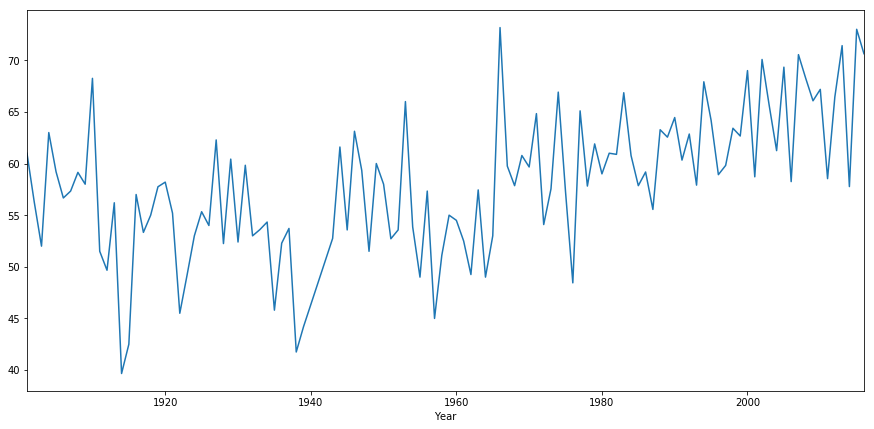

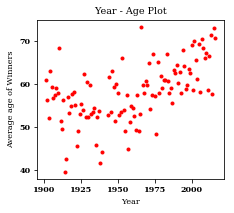

In [40]:
#Visualizing the average age of winners in each year as 2d plots.
fig, ax = plt.subplots(figsize=(15,7))

#Plotting the mean graph.
age_df.groupby('Year')['Age'].mean().plot(ax=ax)

#Getting the same finding as the above as a vector to be able to plot it as scatter plot.
age_plot = age_df.groupby('Year')['Age'].mean()

#Building the scatter plot.
with mpl.rc_context(rc={'font.family': 'serif', 'font.weight': 'bold', 'font.size': 8}):
    fig = plt.figure(figsize=(6,3))
    ax1 = fig.add_subplot(121)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Average age of Winners')
    ax1.set_title("Year - Age Plot")
    plt.plot(age_plot, 'r.')
    

    
    plt.tight_layout()

**The graphs show that there is no correlation between the average age of the winners and the year that the prizes were won.**